In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from xgboost import plot_importance

Using TensorFlow backend.


In [7]:
data1 = pd.read_csv('final_train_r_al.csv',index_col = 0)
data1.head()

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score,weight
0,1,0,594,510000,10000,0,363,3487,494,1,...,0,74,54,2,3,0,98,275712,4.9,4.875197
1,1,0,594,510000,10000,1,217,490000,781,1,...,0,58,89,3,1,0,599,2581,4.9,5.017280
2,1,0,594,510000,10000,1,14,80000,624,0,...,0,57,63,0,5,0,379,4397,4.7,4.795791
3,1,0,594,510000,10000,1,271,260000,7286,0,...,0,127,131,41,2,0,328,151674,4.7,5.703782
4,1,0,594,510000,10000,1,268,250000,10000,0,...,0,54,67,31,2,0,790,194904,4.8,5.030438


In [8]:
data2 = pd.read_csv('final_train_r_pl.csv',index_col = 0)
data2.head()

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score,weight
0,1,0,594,510000,10000,0,363,3487,494,1,...,0,74,54,2,3,0,98,275712,4.9,4.385538
1,1,0,594,510000,10000,1,217,490000,781,1,...,0,58,89,3,1,0,599,2581,4.9,4.529028
2,1,0,594,510000,10000,1,14,80000,624,0,...,0,57,63,0,5,0,379,4397,4.7,4.310951
3,1,0,594,510000,10000,1,271,260000,7286,0,...,0,127,131,41,2,0,328,151674,4.7,5.190208
4,1,0,594,510000,10000,1,268,250000,10000,0,...,0,54,67,31,2,0,790,194904,4.8,4.507102


In [9]:
data3 = pd.read_csv('final_train_r_ll.csv',index_col = 0)
data3.head()

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,...,video,no_likes,no_comments,no_reposts,no_topics,no_related_accounts,product_price,product_popularity,produc_score,weight
0,1,0,594,510000,10000,0,363,3487,494,1,...,0,74,54,2,3,0,98,275712,4.9,4.385538
1,1,0,594,510000,10000,1,217,490000,781,1,...,0,58,89,3,1,0,599,2581,4.9,4.529028
2,1,0,594,510000,10000,1,14,80000,624,0,...,0,57,63,0,5,0,379,4397,4.7,4.310951
3,1,0,594,510000,10000,1,271,260000,7286,0,...,0,127,131,41,2,0,328,151674,4.7,5.190208
4,1,0,594,510000,10000,1,268,250000,10000,0,...,0,54,67,31,2,0,790,194904,4.8,4.507102


# drop no comment, like, repost

In [10]:
data1 = data1.drop(['no_likes','no_comments','no_reposts'], axis=1)
data2 = data2.drop(['no_likes','no_comments','no_reposts'], axis=1)
data3 = data3.drop(['no_likes','no_comments','no_reposts'], axis=1)
data1.head()

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,post,picture,video,no_topics,no_related_accounts,product_price,product_popularity,produc_score,weight
0,1,0,594,510000,10000,0,363,3487,494,1,120,6,0,3,0,98,275712,4.9,4.875197
1,1,0,594,510000,10000,1,217,490000,781,1,72,4,0,1,0,599,2581,4.9,5.017280
2,1,0,594,510000,10000,1,14,80000,624,0,30,4,0,5,0,379,4397,4.7,4.795791
3,1,0,594,510000,10000,1,271,260000,7286,0,65,1,0,2,0,328,151674,4.7,5.703782
4,1,0,594,510000,10000,1,268,250000,10000,0,168,1,0,2,0,790,194904,4.8,5.030438


# Random Forest

In [27]:
from sklearn.model_selection import train_test_split

x=data1.drop('weight', axis = 1)  # Features
y=data1['weight']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0) # 70% training and 30% test

In [28]:
from sklearn.model_selection import GridSearchCV
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees

parameters = {'n_estimators':range(80,100,10),"max_features":range(5,15,5)}
rf = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=8)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train)
rf.best_score_, rf.best_params_

(0.8031154979632876, {'max_features': 10, 'n_estimators': 90})

In [29]:
#R^2
from sklearn.metrics import r2_score
predictions = rf.predict(X_test)
r2_score(y_test, predictions)

0.8145822378253498

In [14]:
from sklearn.model_selection import train_test_split

x=data2.drop('weight', axis = 1)  # Features
y=data2['weight']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0) # 70% training and 30% test

In [15]:
from sklearn.model_selection import GridSearchCV
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees

parameters = {'n_estimators':range(80,100,10),"max_features":range(5,15,5)}
rf = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=8)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train)
rf.best_score_, rf.best_params_

(0.8020360519760238, {'max_features': 10, 'n_estimators': 80})

In [16]:
#R^2
from sklearn.metrics import r2_score
predictions = rf.predict(X_test)
r2_score(y_test, predictions)

0.8165194608952374

In [17]:
from sklearn.model_selection import train_test_split

x=data3.drop('weight', axis = 1)  # Features
y=data3['weight']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0) # 70% training and 30% test

In [18]:
from sklearn.model_selection import GridSearchCV
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees

parameters = {'n_estimators':range(80,100,10),"max_features":range(5,15,5)}
rf = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=8)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train)
rf.best_score_, rf.best_params_

(0.8016912687784473, {'max_features': 10, 'n_estimators': 90})

In [19]:
#R^2
from sklearn.metrics import r2_score
predictions = rf.predict(X_test)
r2_score(y_test, predictions)

0.8166885444575585

# Visualization

In [30]:
rf = RandomForestRegressor(max_features=10, n_estimators = 90, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [31]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp.head(10)

blogger_fans          0.492778
post                  0.104007
blogger_posts         0.102135
blogger_follows       0.063759
picture               0.049319
blogger_tag           0.046500
brand_fans            0.023747
product_popularity    0.023254
product_price         0.022202
brand_posts           0.019113
dtype: float64

No handles with labels found to put in legend.


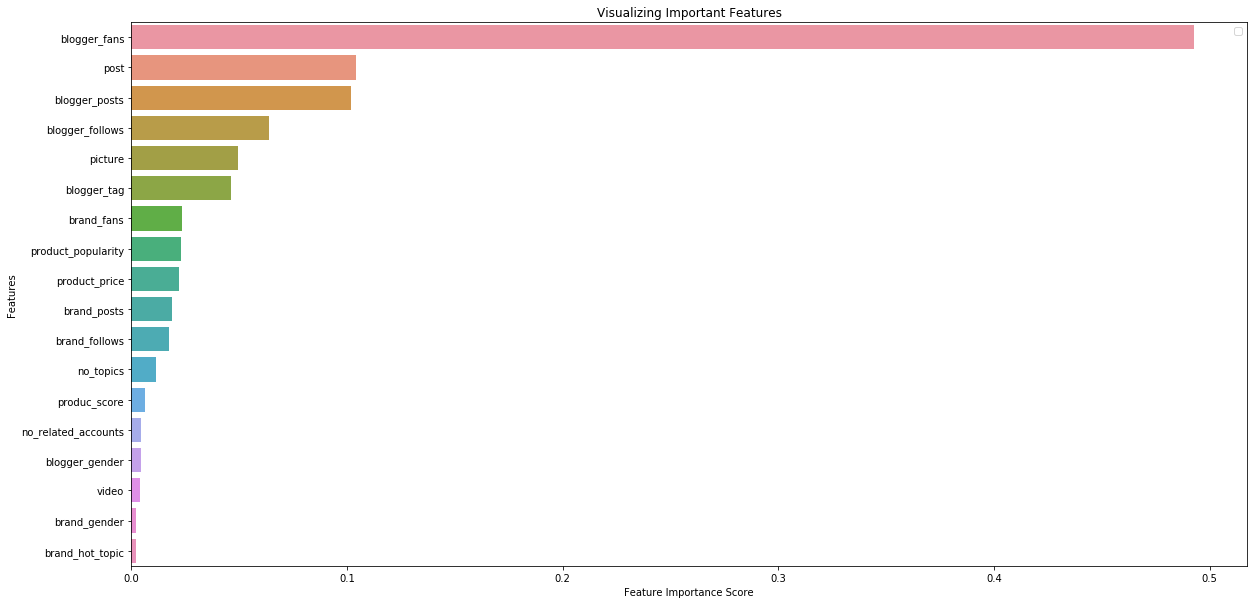

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,10)) 
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Prediction

In [139]:
predict = pd.read_csv('test_2brands.csv',index_col = 0)
predict = predict.iloc[2788:5576]
predict

,blogger_name,blogger_id,blogger_gender,blogger_region,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_uid,brand_blog_name,...,product,product_price,product_popularity,produc_score,class,post,picture,video,no_topics,no_related_accounts
0,小米苏酥,87768787,female,海外,NaN,594,510000,10000,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,1,118,6,1,1,0
1,萌大雨YUYU,1011269330,female,其他,"时尚达人,知名美妆博主,时尚美妆视频自媒体",57,3870000,1343,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
2,missfaye,1032937413,female,北京,"时尚达人,知名时尚博主,微博尤物志合作达人",1467,800000,20000,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
3,kittywenny,1036701494,female,上海,"资深时尚美容达人,微博尤物志合作达人,微博vlog博主,微博签约自媒体",986,1390000,7502,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
4,羽晗winnie,1039619890,female,北京,"知名旅行玩家美食达人,微博vlog博主,知名时尚博主,头条文章作者,微博签约自媒体",321,3940000,1195,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
5,潘朵拉Pandore,1053409732,female,上海,"美妆博主,时尚达人,头条文章作者",2805,1080000,10000,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
6,Etsuna悦奈inTokyo,1053701534,female,海外,"知名时尚博主,时尚达人,时尚美妆视频自媒体",87,1950000,10000,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
7,ZY大暖,1066162524,male,浙江,知名时尚博主,65,610000,4045,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,1,118,6,1,1,0
8,mandy_014,1075376185,female,广东,"时尚达人,广州市天盈化妆品有限公司市场策划主管,知名美妆博主,头条文章作者",2237,2340000,4009,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,0,118,6,1,1,0
9,壹十七少,1087289147,female,湖北,"微博vlog博主,时尚博主",759,330000,1068,1689230932,Origins悦木之源,...,悦木之源炭瓷膜,200,278952,4.9,1,118,6,1,1,0


In [140]:
data1.columns

Index(['blogger_gender', 'blogger_tag', 'blogger_follows', 'blogger_fans',
       'blogger_posts', 'brand_gender', 'brand_follows', 'brand_fans',
       'brand_posts', 'brand_hot_topic', 'post', 'picture', 'video',
       'no_topics', 'no_related_accounts', 'product_price',
       'product_popularity', 'produc_score', 'weight'],
      dtype='object')

In [141]:
predict.columns

Index(['blogger_name', 'blogger_id', 'blogger_gender', 'blogger_region',
       'blogger_tag', 'blogger_follows', 'blogger_fans', 'blogger_posts',
       'brand_uid', 'brand_blog_name', 'brand_gender', 'brand_region',
       'brand_tag', 'brand_follows', 'brand_fans', 'brand_posts', 'brand_name',
       'brand_hot_topic', 'product', 'product_price', 'product_popularity',
       'produc_score', 'class', 'post', 'picture', 'video', 'no_topics',
       'no_related_accounts'],
      dtype='object')

In [142]:
predic = predict[['blogger_gender', 'blogger_tag', 'blogger_follows', 'blogger_fans',
       'blogger_posts', 'brand_gender', 'brand_follows', 'brand_fans',
       'brand_posts', 'brand_hot_topic', 'post', 'picture', 'video',
       'no_topics', 'no_related_accounts', 'product_price',
       'product_popularity', 'produc_score']]
predic

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,post,picture,video,no_topics,no_related_accounts,product_price,product_popularity,produc_score
0,female,NaN,594,510000,10000,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
1,female,"时尚达人,知名美妆博主,时尚美妆视频自媒体",57,3870000,1343,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
2,female,"时尚达人,知名时尚博主,微博尤物志合作达人",1467,800000,20000,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
3,female,"资深时尚美容达人,微博尤物志合作达人,微博vlog博主,微博签约自媒体",986,1390000,7502,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
4,female,"知名旅行玩家美食达人,微博vlog博主,知名时尚博主,头条文章作者,微博签约自媒体",321,3940000,1195,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
5,female,"美妆博主,时尚达人,头条文章作者",2805,1080000,10000,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
6,female,"知名时尚博主,时尚达人,时尚美妆视频自媒体",87,1950000,10000,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
7,male,知名时尚博主,65,610000,4045,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
8,female,"时尚达人,广州市天盈化妆品有限公司市场策划主管,知名美妆博主,头条文章作者",2237,2340000,4009,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
9,female,"微博vlog博主,时尚博主",759,330000,1068,female,167,390000,10000,0,118,6,1,1,0,200,278952,4.9


In [143]:
blg_gender = []
for i in predic['blogger_gender'].tolist():
    if i == 'female':
        blg_gender.append(1)
    else:
        blg_gender.append(0)
predic['blogger_gender'] = blg_gender

C:\Users\panji\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [144]:
brd_gender = []
for i in predic['brand_gender'].tolist():
    if i == 'female':
        brd_gender.append(1)
    else:
        brd_gender.append(0)
predic['brand_gender'] = brd_gender

C:\Users\panji\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [145]:
tag_num = []
for i in predic['blogger_tag'].tolist():
    if pd.isnull(i):
        tag_num.append(0)
        continue
    lst = i.split(',')
    tag_num.append(len(lst))
predic['blogger_tag'] = tag_num

C:\Users\panji\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [146]:
predic.head()

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,post,picture,video,no_topics,no_related_accounts,product_price,product_popularity,produc_score
0,1,0,594,510000,10000,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
1,1,3,57,3870000,1343,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
2,1,3,1467,800000,20000,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
3,1,4,986,1390000,7502,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9
4,1,5,321,3940000,1195,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9


In [147]:
pre = rf.predict(predic)

In [148]:
predic['score'] = pre
predic['name'] = predict['blogger_name']
predic.head()

C:\Users\panji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\panji\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,post,picture,video,no_topics,no_related_accounts,product_price,product_popularity,produc_score,score,name
0,1,0,594,510000,10000,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,5.004222,小米苏酥
1,1,3,57,3870000,1343,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,8.426134,萌大雨YUYU
2,1,3,1467,800000,20000,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,5.820943,missfaye
3,1,4,986,1390000,7502,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,7.593984,kittywenny
4,1,5,321,3940000,1195,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,8.917279,羽晗winnie


In [149]:
df = predic.sort_values("score", ascending = False)

In [150]:
df.head(10)

,blogger_gender,blogger_tag,blogger_follows,blogger_fans,blogger_posts,brand_gender,brand_follows,brand_fans,brand_posts,brand_hot_topic,post,picture,video,no_topics,no_related_accounts,product_price,product_popularity,produc_score,score,name
34,1,2,428,7380000,2566,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.845129,ai媚儿
260,1,4,1385,6330000,2193,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.831915,韩恩汐汐
986,1,6,1487,3940000,7239,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.615266,刘佳妮丶
913,1,4,4231,6340000,4574,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.525650,玉米酱罐头
1108,1,2,411,11030000,2593,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.466918,林小宅-
531,1,5,519,5270000,725,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.440459,aki猫咪
819,1,5,1398,7860000,6545,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.435596,丁一晨DYC
1331,1,5,690,3690000,2591,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.424985,帅你一脸毛蛋
486,1,4,2071,3820000,2650,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.422946,妙琳Yukiki
179,1,5,541,5690000,1014,1,167,390000,10000,0,118,6,1,1,0,200,278952,4.9,9.418927,仇仇-qiuqiu


In [151]:
df.to_csv('rf_regression_result.csv')